Folder already exists
Folder already exists


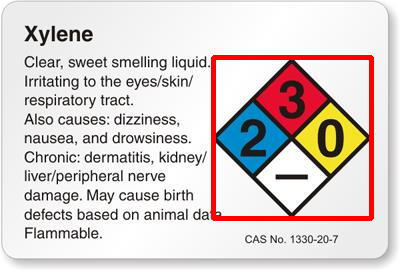

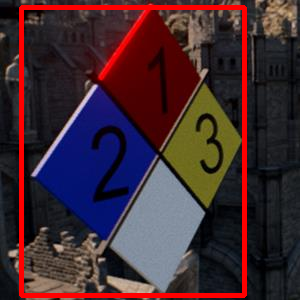

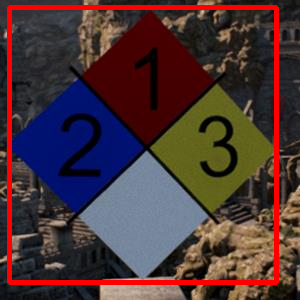

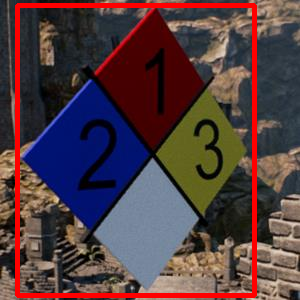

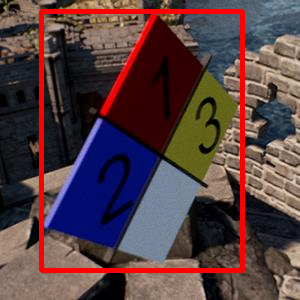

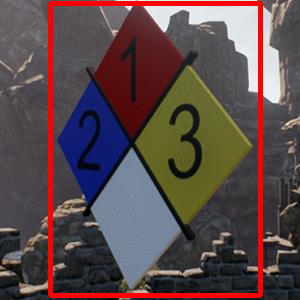

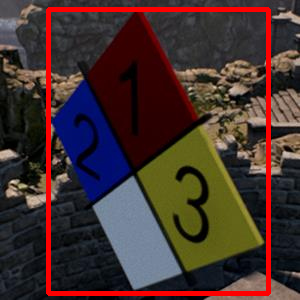

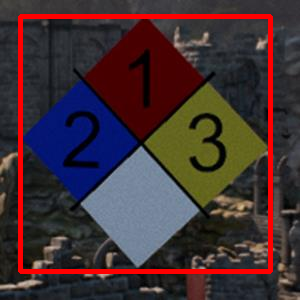

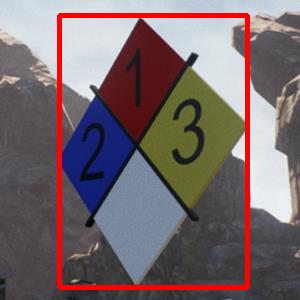

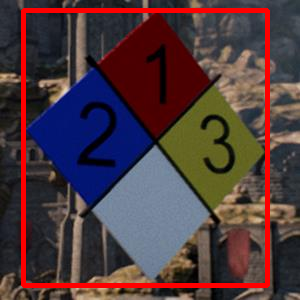

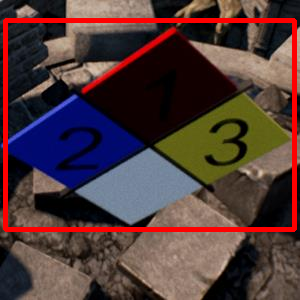

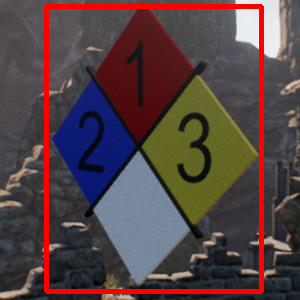

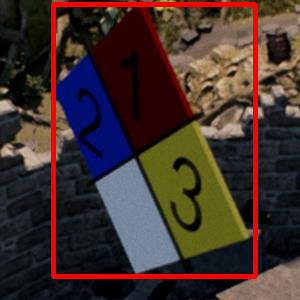

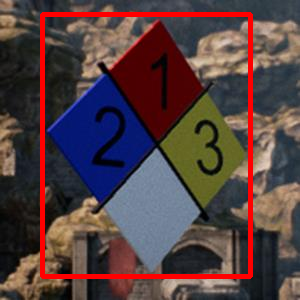

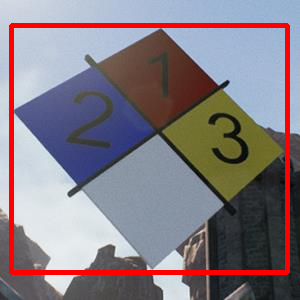

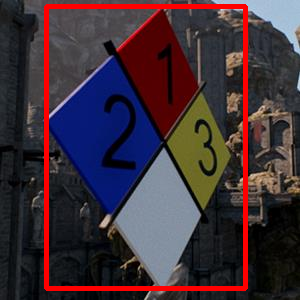

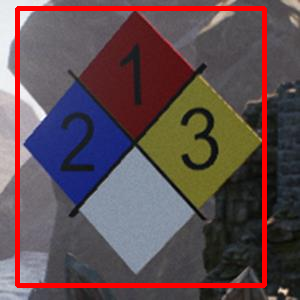

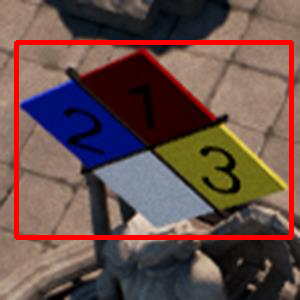

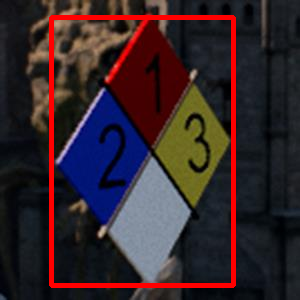

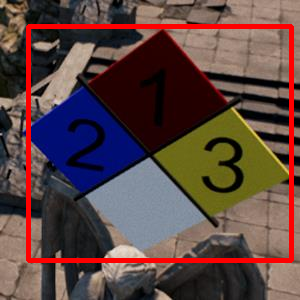

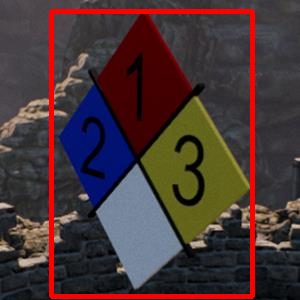

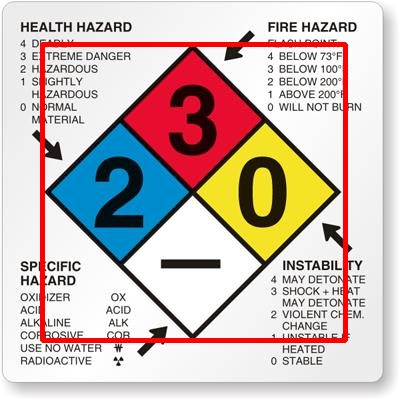

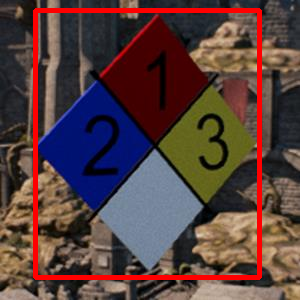

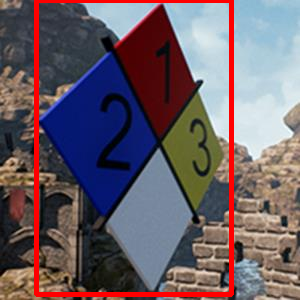

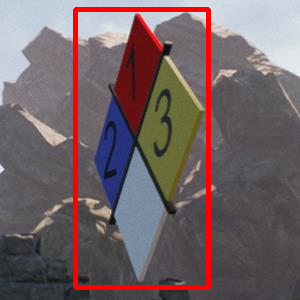

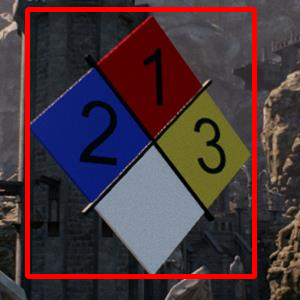

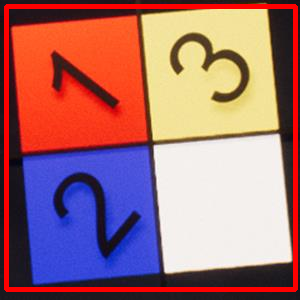

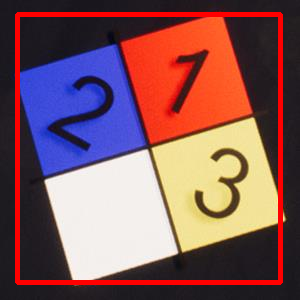

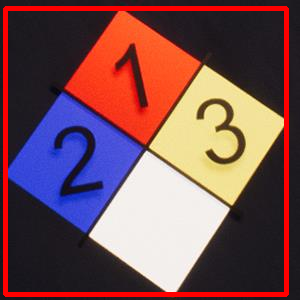

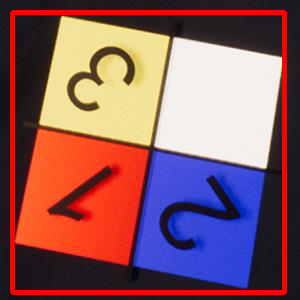

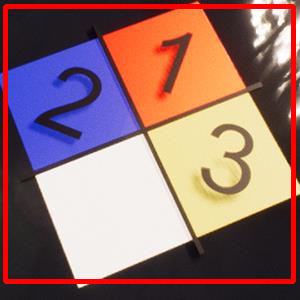

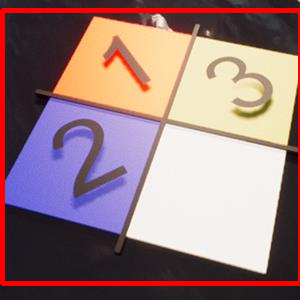

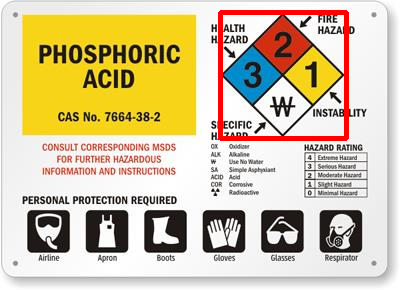

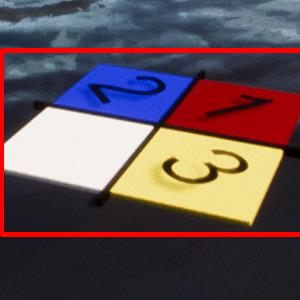

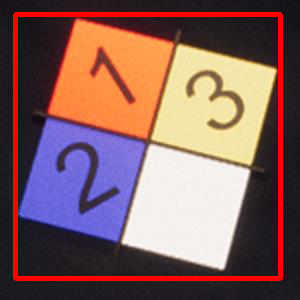

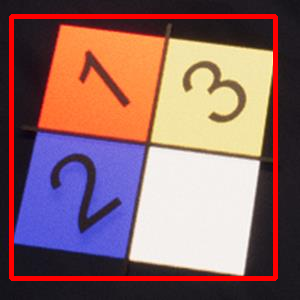

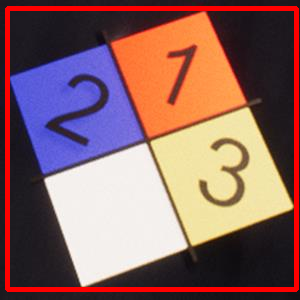

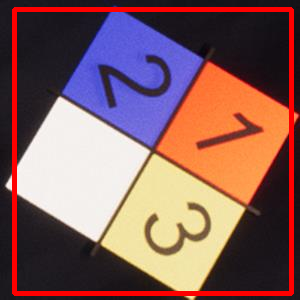

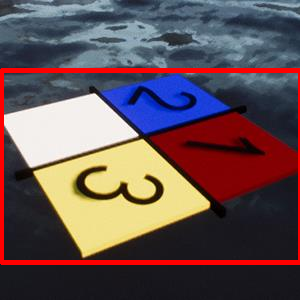

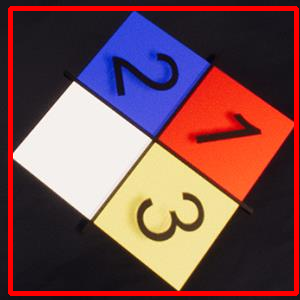

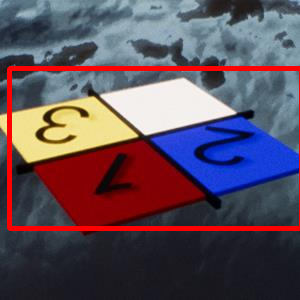

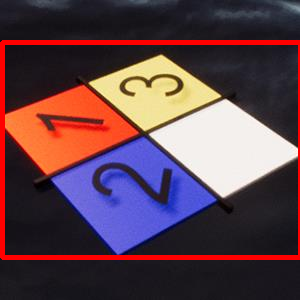

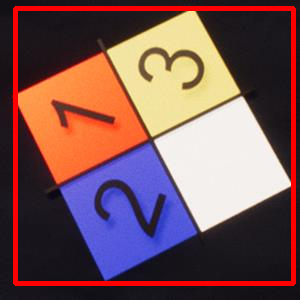

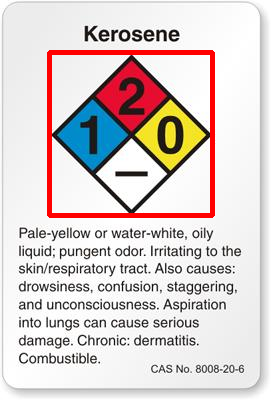

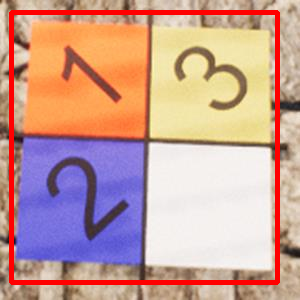

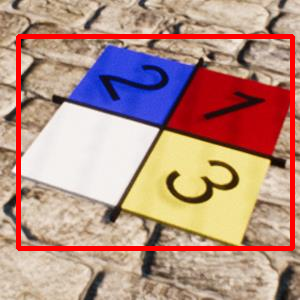

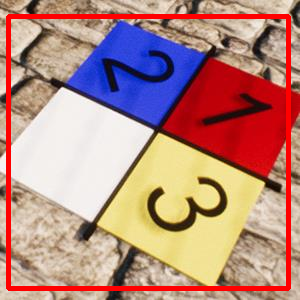

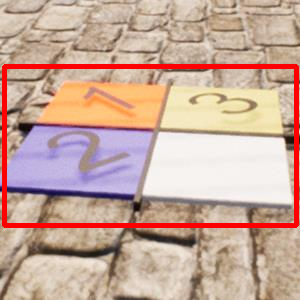

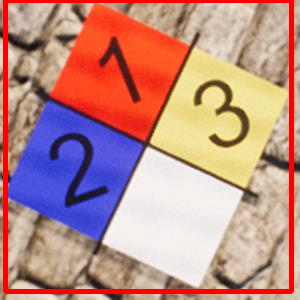

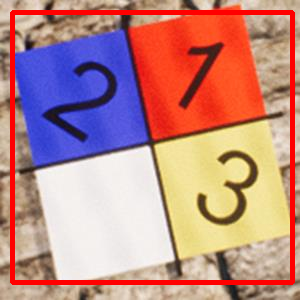

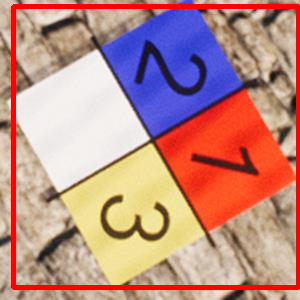

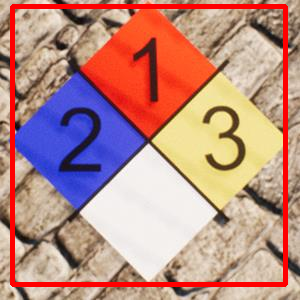

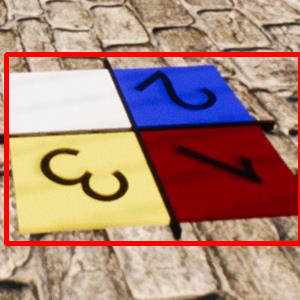

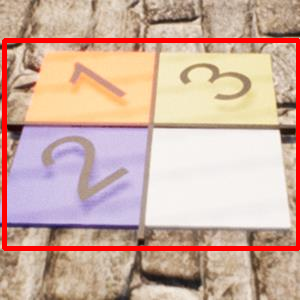

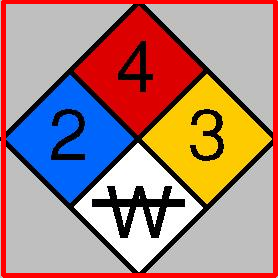

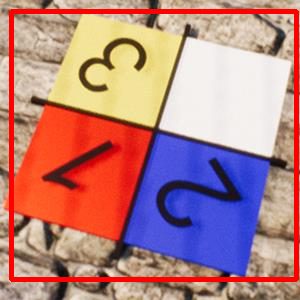

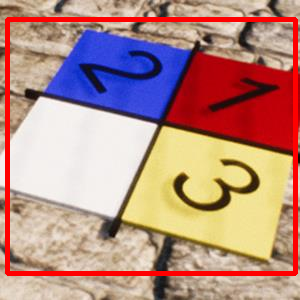

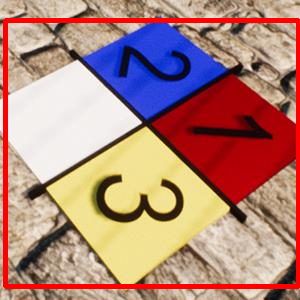

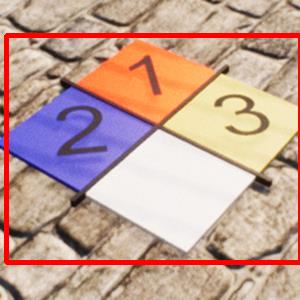

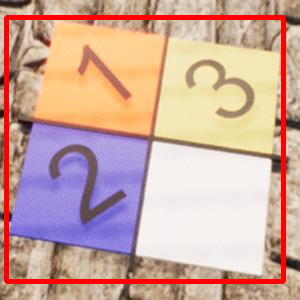

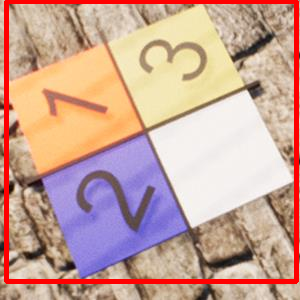

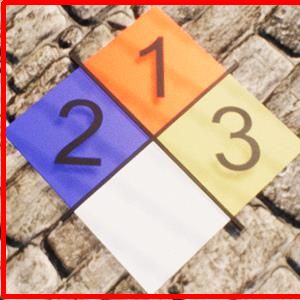

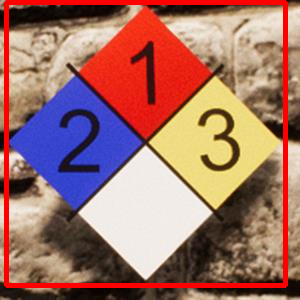

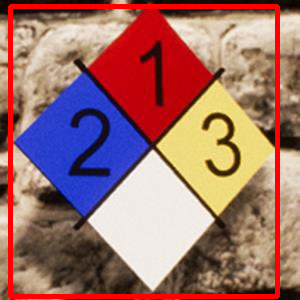

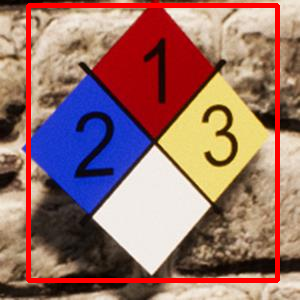

In [0]:
import os  
import cv2
import glob
from google.colab.patches import cv2_imshow
from xml.etree.ElementTree import Element, SubElement, Comment, tostring, ElementTree
#from ElementTree_pretty import prettify

def folder(name, cpath):
    
  directory = name 
  parent_dir = cpath
        
  path = os.path.join(parent_dir, directory)
  try:
    os.mkdir(path)
  except:
    print('Folder already exists') 

def xmllabel(fname, upath, w, h, d):
  
  top = Element('annotation')

  folder = SubElement(top, 'folder')
  folder.text = 'OutputLabels'

  filename = SubElement(top, 'filename')
  filename.text = fname[:-3]+'jpg'

  path = SubElement(top, 'path')
  path.text = upath

  source = SubElement(top, 'source')
  database = SubElement(source, 'Unknown')
  database.text = 'Unknown'

  size = SubElement(top, 'size')
  width = SubElement(size, 'width')
  width.text = str(w)
  height = SubElement(size, 'height')
  height.text = str(h)
  depth = SubElement(size, 'depth')
  depth.text = str(d)


  #print prettify(top)
  return top

def xmlobj(top, x1, y1, x2, y2):
  object1 = SubElement(top, 'object')
  name = SubElement(object1, 'name')
  name.text = 'nfpa'
  pose = SubElement(object1, 'pose')
  pose.text = 'Unspecified'
  truncated = SubElement(object1, 'truncated')
  truncated.text = '0'
  difficult = SubElement(object1, 'difficult')
  difficult.text = '0'

  bndbox = SubElement(object1, 'bndbox')
  xmin = SubElement(bndbox, 'xmin')
  xmin.text = str(x1)
  ymin = SubElement(bndbox, 'ymin')
  ymin.text = str(y1)
  xmax = SubElement(bndbox, 'xmax')
  xmax.text = str(x2)
  ymax = SubElement(bndbox, 'ymax')
  ymax.text = str(y2)

folder('OutputImages','/content')
folder('OutputLabels','/content')

path = '/content/Fol'


for infile in sorted(glob.glob( os.path.join(path, 'pos*.txt') )):

   # print ("current file is: " + infile)
    fname = os.path.basename(infile)
    img = cv2.imread(infile[:-3]+'jpg')
    top = xmllabel(fname,os.path.join(path, 'OutputLabels'),img.shape[0],img.shape[1],img.shape[2])
    file = open(infile,"r")
    #print(file.readline())
    #print (tostring(top))
    k = 0
    for j in file.readlines():
      i = j.split()
      c = float(i[0])
      x = float(i[1])
      y = float(i[2])
      w = float(i[3])
      h = float(i[4])

      #print (infile[:-3]+'jpg')


      
      x = x*img.shape[1]  
      y = y*img.shape[0]   
      w = w*img.shape[1]
      h = h*img.shape[0]

      xmax = int(x + w/2)
      xmin = int(x - w/2)
      ymax = int(y + h/2)
      ymin = int(y - h/2)

      cv2.rectangle(img,(int(xmin),int(ymin)),(int(xmax),int(ymax)),(0,0,255), 3)

      xmlobj(top,xmin,ymin,xmax,ymax)

    file.close()
    file1 = open('/content/OutputLabels/'+fname[:-3]+'xml','w+')
    ElementTree(top).write('/content/OutputLabels/'+fname[:-3]+'xml')
    cv2_imshow(img)
    cv2.imwrite('/content/OutputImages/'+fname+'.jpg',img)


        
			